## 1. The Governing Equations & Assumptions

The **SIR Model** divides a constant population $N$ into three compartments: Susceptible ($S$), Infected ($I$), and Recovered ($R$).
### The Equations
$$\begin{cases} \dot{S} = -\beta SI \\ \dot{I} = \beta SI - \gamma I \\ \dot{R} = \gamma I \end{cases}$$
## 2. Rationalizing the Variables

- **$S(t)$, $I(t)$, $R(t)$:** Represent the number of individuals in each category at time $t$. Units: _Individuals_.
- **$\beta$ (Infection Rate):** Quantifies how likely it is for the disease to transmit during a contact between a susceptible and an infected person. The product $SI$ reflects the "**Law of Mass Action,**" where the rate depends on the frequency of interactions. Units: $1/(\text{individuals} \cdot \text{time})$.
- **$\gamma$ (Recovery Rate):** Represents the speed at which infected individuals recover or are removed from the infectious pool. Units: $1/\text{time}$.
- **$\delta$ (Loss of Immunity):** Found in the **SIRS** model; represents the rate at which recovered individuals lose immunity and become susceptible again. Units: $1/\text{time}$.
- **$N$ (Total Population):** The fixed scale of the system.
### Biological Hypotheses & Assumptions

- **Constant Population:** Birth and death rates are neglected or balanced such that $S + I + R = N$.
- **No Incubation Period:** Individuals become infectious immediately upon contact.
- **Permanent Immunity:** In the basic SIR model, recovered individuals stay in the $R$ compartment forever.
- **Homogeneous Mixing:** Every individual has an equal likelihood of contacting any other individual, regardless of age or social habits.
## 3. The Narrative Derivation: From Infection to Epidemic

### Step 1: Evaluating the Outbreak Condition

To determine if an epidemic will occur, we look at the rate of change for the infected population at the very beginning ($t=0$), where $I(0) = I_0$ (a small number) and $S(0) \approx N$.
$$\dot{I} = I(\beta S - \gamma)$$
For the disease to spread, $\dot{I}$ must be greater than zero.
$$I_0(\beta S_0 - \gamma) > 0 \implies \beta S_0 > \gamma$$
### Step 2: Defining $R_0$ (The Basic Reproduction Number)

We rearrange the inequality to define the most critical value in epidemiology:
$$R_0 = \frac{\beta S_0}{\gamma}$$
If $R_0 > 1$, the disease becomes an epidemic. If $R_0 < 1$, the number of infected individuals will decline toward zero.
### Step 3: Vaccination Strategy

To stop an epidemic, we must reduce the susceptible population ($S_0$) such that $R_0 < 1$. If $P$ is the percentage of vaccinated people, the new susceptible pool is $S_0^v = (1-P)N$.
$$\frac{\beta}{\gamma}(1-P)N < 1 \implies (1-P) < \frac{\gamma}{\beta N}$$
Solving for $P$, we find the **Herd Immunity Threshold**:
$$P > 1 - \frac{1}{R_0}$$
## 5. System Behavior & Stability (SIRS Model)

In the **SIRS model**, individuals flow from $R$ back to $S$ at rate $\delta$.
$$\dot{S} = -\beta SI + \delta(N - S - I)$$
$$\dot{I} = \beta SI - \gamma I$$
### Identifying Steady States

1. **Disease-Free Equilibrium (DFE):** $(S^*, I^*) = (N, 0)$.
2. **Endemic Equilibrium:** Where the disease persists in the population. Setting $\dot{I} = 0$: $I(\beta S - \gamma) = 0 \implies S^* = \frac{\gamma}{\beta}$. Setting $\dot{S} = 0$ and substituting $S^*$: $I^* = \frac{N - \gamma/\beta}{1 + \gamma/\delta}$.
### Stability Analysis via the Jacobian

The stability is determined by the Jacobian matrix $J(S,I)$:
$$J(S,I) = \begin{bmatrix} -\beta I - \delta & -\beta S - \delta \\ \beta I & \beta S - \gamma \end{bmatrix}$$
Evaluate $J$ at $(N, 0)$:
$$J(N, 0) = \begin{bmatrix} -\delta & -\beta N - \delta \\ 0 & \beta N - \gamma \end{bmatrix}$$
Because this is an upper triangular matrix (there is a $0$ in the bottom-left), the **Eigenvalues** ($\lambda$) are simply the entries on the main diagonal:

- $\lambda_1 = -\delta$
- $\lambda_2 = \beta N - \gamma$

- For the DFE to be **stable** (meaning no epidemic), all eigenvalues must be negative ($\lambda < 0$).
	- $\lambda_1 = -\delta$ is always negative (rate of immunity loss is positive).
	- For $\lambda_2 < 0$, we require $\beta N - \gamma < 0$. Rearranging gives: $\beta N < \gamma \implies \frac{\beta N}{\gamma} < 1$.
	- This is the birth of the **Basic Reproduction Number**, $R_0 = \frac{\beta N}{\gamma}$. If $R_0 > 1$, then $\lambda_2 > 0$, the DFE becomes unstable, and an epidemic occurs.

If $R_0 > 1$, the system moves to the endemic state $(S^*, I^*) = (\frac{\gamma}{\beta}, \frac{N - \gamma/\beta}{1 + \gamma/\delta})$. Evaluating $J$ at this point:
$$J(S^*, I^*) = \begin{bmatrix} -\beta I^* - \delta & -\gamma - \delta \\ \beta I^* & 0 \end{bmatrix}$$
- **Trace ($T$)**: Sum of diagonals = $-\beta I^* - \delta$. Since all terms are positive, $T < 0$.
- **Determinant ($D$)**: $(-\beta I^* - \delta)(0) - (-\gamma - \delta)(\beta I^*) = \beta I^*(\gamma + \delta)$. Since all terms are positive, $D > 0$.

**Conclusion:** Because $T < 0$ and $D > 0$, the endemic equilibrium is **stable**. If $D > \frac{T^2}{4}$, the system will exhibit damped oscillations (spiraling) as it settles into the endemic state.

### The Classic SIR

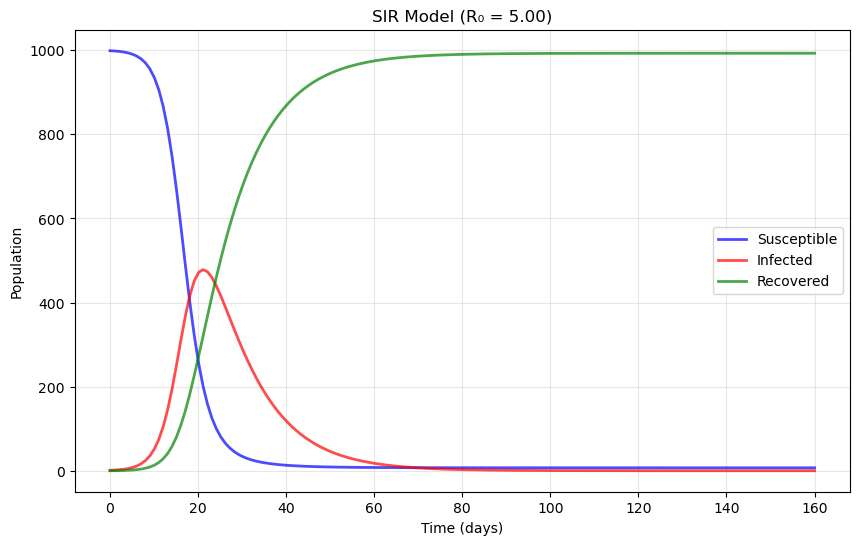

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    didt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, didt, dRdt]


N = 1000          # Total population
beta = 0.0005     # Infection rate
gamma = 0.1       # Recovery rate

R0 = (beta * N) / gamma

# Initial conditions: 1 infected, 0 recovered, rest susceptible
I0, R0_pop = 1, 0
S0 = N - I0 - R0_pop
y0 = [S0, I0, R0_pop]

t = np.linspace(0, 160, 160) # Time grid

ret = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = ret.T

plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', alpha=0.7, lw=2, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.7, lw=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.7, lw=2, label='Recovered')
plt.title(f'SIR Model (R₀ = {R0:.2f})')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### The SIRS Phase Portrait (Stability & Oscillations)

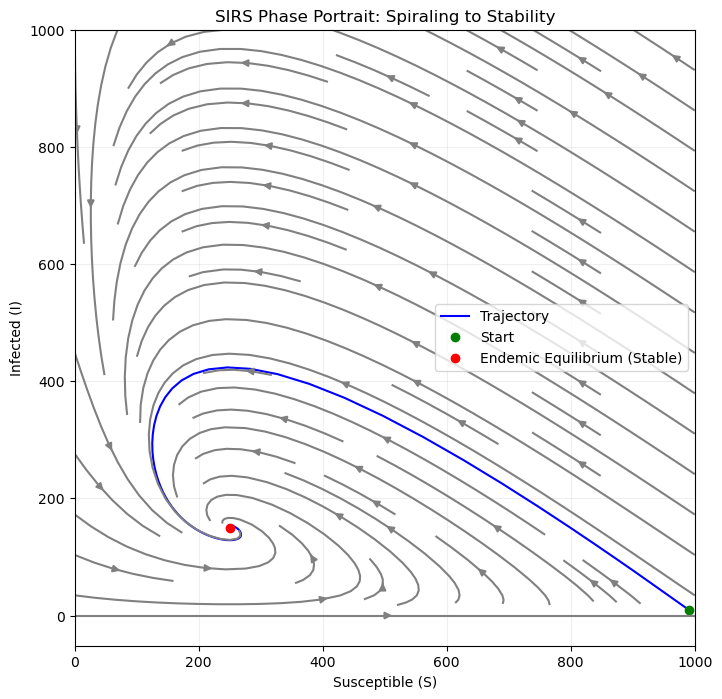

In [3]:
def sirs_model(y, t, beta, gamma, delta, N):
    S, I = y
    dSdt = -beta * S * I + delta * (N - S - I)
    didt = beta * S * I - gamma * I
    return [dSdt, didt]

# Parameters for a spiraling endemic state
N_pop = 1000
beta_val = 0.0008
gamma_val = 0.2
delta_val = 0.05 # Rate of losing immunity

t_sirs = np.linspace(0, 500, 1000)
y0_sirs = [990, 10] # Start with 10 infected

sol = odeint(sirs_model, y0_sirs, t_sirs, args=(beta_val, gamma_val, delta_val, N_pop))

plt.figure(figsize=(8, 8))
plt.plot(sol[:, 0], sol[:, 1], 'b-', label='Trajectory')
plt.plot(sol[0, 0], sol[0, 1], 'go', label='Start') # Start point

S_star = gamma_val / beta_val
I_star = (N_pop - S_star) / (1 + gamma_val/delta_val)
plt.plot(S_star, I_star, 'ro', label='Endemic Equilibrium (Stable)')

s_range = np.linspace(0, N_pop, 20)
i_range = np.linspace(0, N_pop, 20)
SS, II = np.meshgrid(s_range, i_range)
u, v = sirs_model([SS, II], 0, beta_val, gamma_val, delta_val, N_pop)
plt.streamplot(SS, II, u, v, color='gray')

plt.xlabel('Susceptible (S)')
plt.ylabel('Infected (I)')
plt.title('SIRS Phase Portrait: Spiraling to Stability')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

In the SIRS phase portrait, you'll see the line circle the red dot. This confirms your stability analysis ($D > T^2/4$); the system doesn't just crash into equilibrium; it "hunts" for it through cycles of waning immunity and reinfection. 

In a simulation, the blue line appears to "reach" the red dot because of the scale of the plot and the limits of numerical precision. However, mathematically, it is likely still performing tiny, microscopic spirals as it settles.

This behavior depends entirely on the damping ratio. If the system is highly damped, it settles quickly; if it is weakly damped, you get those beautiful, long-lasting oscillations.

To see the "spiraling" more clearly than a phase portrait allows, it helps to look at the Infected population over a long duration. This shows the "waves" of the disease that get smaller over time until they reach the steady state.

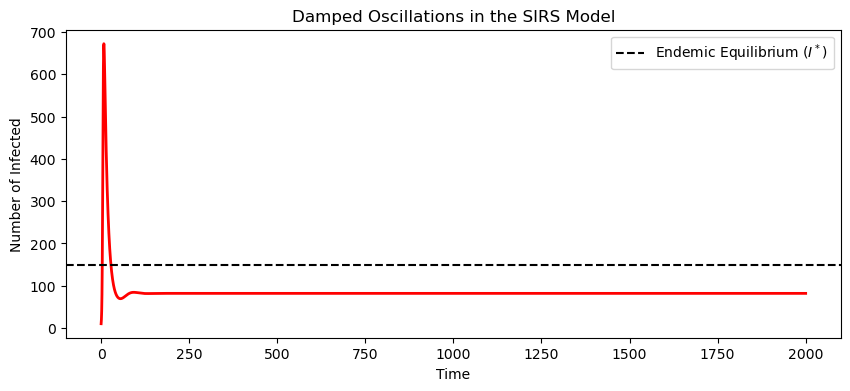

In [4]:
# Adjusting parameters to show more distinct oscillations
beta_val = 0.001  # Increased infection rate
gamma_val = 0.1   # Slower recovery
delta_val = 0.01  # Slow loss of immunity

t_long = np.linspace(0, 2000, 5000) 
sol_long = odeint(sirs_model, y0_sirs, t_long, args=(beta_val, gamma_val, delta_val, N_pop))

plt.figure(figsize=(10, 4))
plt.plot(t_long, sol_long[:, 1], color='red', lw=2)
plt.axhline(y=I_star, color='black', linestyle='--', label='Endemic Equilibrium ($I^*$)')
plt.title('Damped Oscillations in the SIRS Model')
plt.xlabel('Time')
plt.ylabel('Number of Infected')
plt.legend()
plt.show()